In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('loan_data.csv')
# data.info()
# data.describe()
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

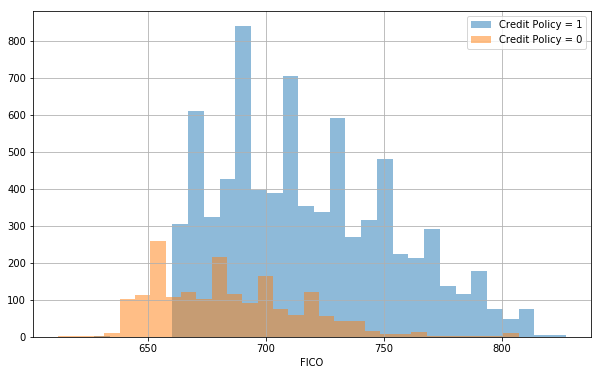

In [3]:
plt.figure(figsize = (10, 6))
data[data['credit.policy'] == 1]['fico'].hist(bins = 30, label = 'Credit Policy = 1', alpha = 0.5)
data[data['credit.policy'] == 0]['fico'].hist(bins = 30, label = 'Credit Policy = 0', alpha = 0.5)
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

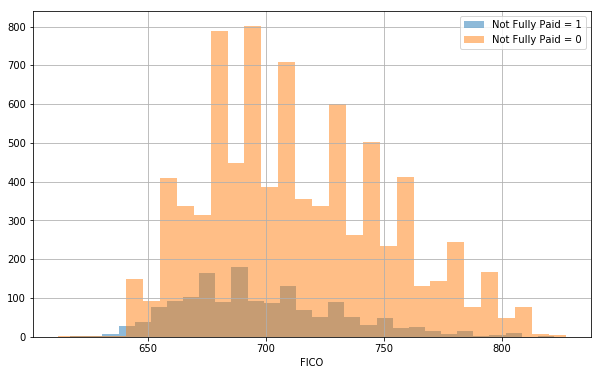

In [4]:
plt.figure(figsize = (10, 6))
data[data['not.fully.paid'] == 1]['fico'].hist(bins = 30, label = 'Not Fully Paid = 1', alpha = 0.5)
data[data['not.fully.paid'] == 0]['fico'].hist(bins = 30, label = 'Not Fully Paid = 0', alpha = 0.5)
plt.legend()
plt.xlabel('FICO')

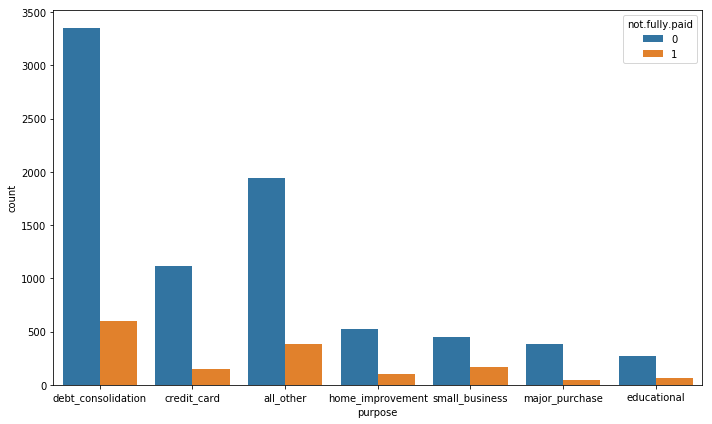

In [5]:
plt.figure(figsize = (10,6))
sns.countplot(data['purpose'], hue = 'not.fully.paid', data = data)
plt.tight_layout()

/home/ps12978/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


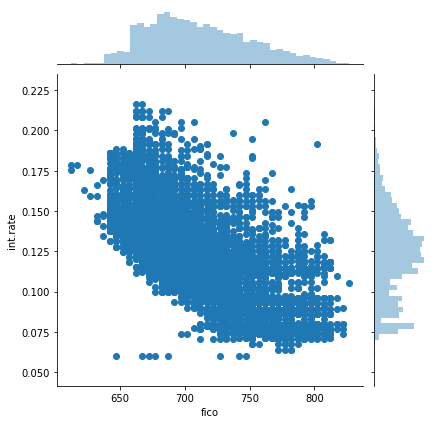

In [6]:
sns.jointplot(x = 'fico', y = 'int.rate', data = data)

<Figure size 720x432 with 0 Axes>

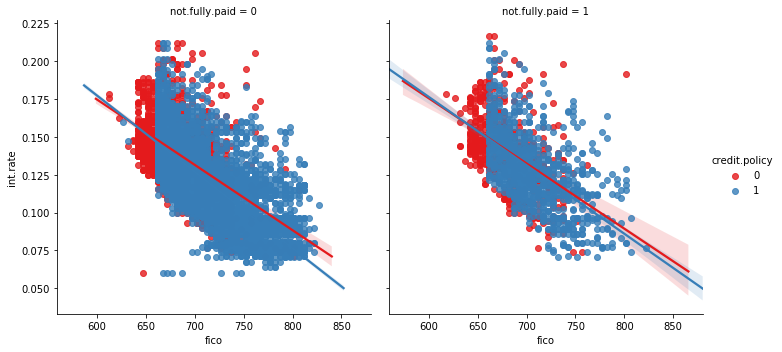

In [7]:
plt.figure(figsize = (10,6))
sns.lmplot(x = 'fico', y = 'int.rate', hue = 'credit.policy', col = 'not.fully.paid', data = data, palette = 'Set1')

In [8]:
categorical_feature = ['purpose']
final_data = pd.get_dummies(data, columns = categorical_feature, drop_first = True)
# final_data.info()
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [9]:
x = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predict = model.predict(xtest)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(ytest, predict))
print('\n')
print(confusion_matrix(ytest, predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2397
           1       0.23      0.24      0.24       477

   micro avg       0.74      0.74      0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



[[2011  386]
 [ 361  116]]


# Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators=600)
model_forest.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predict1 = model_forest.predict(xtest)

In [17]:
print(classification_report(ytest, predict1))
print('\n')
print(confusion_matrix(ytest, predict1))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.27      0.01      0.01       477

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.55      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874



[[2389    8]
 [ 474    3]]


In [22]:
print("Accuracy Score Of Decision Tree Classifier:-", accuracy_score(ytest, predict))

Accuracy Score Of Decision Tree Classifier:- 0.7400835073068893


In [23]:
print("Accuracy Score Of Random Forest Classifier:-", accuracy_score(ytest, predict1))

Accuracy Score Of Random Forest Classifier:- 0.8322894919972165
